    221021_exnode11_gen_image_cifar10
        1. package load
        2. data load : 라벨 data 없슴
        3. 전처리
            - 정규화
            - shuffle 만들기           
        4. DCGAN Model 생성
            - generator model 생성
            - generator instance 생성
            - generator 생성 확인
            - discriminator model 생성
            - discriminator instance 생성
            - discriminator 생성 확인
        5. 손실함수 및 accuracy
            - 손실함수 작성 : cross_entropy, generator_loss, discriminator_loss
            - discriminator_accuracy
        6. optimizer
        7. model detail 생성
            - train_step
            - image graph
            - accuracy 그래프
            - checkpoint
        8. model activation 함수
            - 자원 확인, acting, graph, checkpoint, reacting
                        
        <회고>
        1. GAN의 두 모델 구조를 통해 이미지를 성공적으로 생성하였다.
        
        2. 생성 이미지 시각화 및 학습 그래프를 통해 GAN 학습이 바르게 진행되었음을 입증하였다.
            - epoch를 500번, checkpoint 확인 및 100번씩 진행 
            - 판별이미지는 학습이 진행될 때마다 명확해 지고 있슴. 200번을 지나면서 윤곽을 인지하면서 
              500번이후 사물의 모습을 인지할 수 있었슴
            - loss와 accuracy
              . 생성 이미지:gen_loss 와 판별이미지:disc _loss 가  0.8 - 1.3 사이로 수렴
              . 판별이미지(real accuracy)는 0.4-0.7로 수렴하는데 생성 이미지(fake accuracy)가 0.8 - 1사이로 수렴
              . loss는 일치 하는데 accuracy는 0.4의 차이를 보이고 있슴        
              
        3. 추가적인 GAN 모델구조 혹은 학습과정 개선 아이디어를 제안하고 이를 적용하였다.
            * 개선 아이디어 적용
              - batch size : 128, Drop out : 0.4, LeakyReLU parameter 조정 : alpha =0.3
              
            - 제안 1 : 노이즈를 제어하는 기법을 제안
              i) 절차 : 한 번의 반복이 진행될 때 마다 판별자 학습, 노이즈 생성, 생성자 학습을 진행하고 
                        생성자는 다시 각 클래스별 일정량의 이미지를 생성해 내어 구분기를 통하여 
                        생성이 제대로 이루어진 이미지만을 저장한다. 
                        구분기는 클래스별 일정량의 이미지가 생성되면 구분기를 학습시키고 다음 반복으로 넘어간다.

             ii) 효과 : 기존의 생성적 적대 신경망으로 생성한 이미지를 학습시켰을 경우 약 35%, 
                        노이즈 컨트롤을 사용하여 생성된 이미지를 학습시켰을 경우 약 49%의 정확도를 보인 것을 알 수 있다. 
                        두 가지의 방법을 비교해본다면 14%이상의 차이를 보이는 것을 알 수 있으며 
                        이는 제안하는 방법을 학습 데이터가 적은 경우에 사용한다면 데이터의 양을 늘리기 위해 사용하였던
                        기존의 생성적 적대 신경망보다 더 좋은 성능을 보였다
                       
            iii) 결론 : 노이즈를 제어함으로서의 이점은 생성된 이미지의 품질을 유지할 수 있다는 점과, 
                        생성된 이미지를 다시 학습에 사용하여도 정확도가 상승한다는 이점을 얻을 수 있었다
                        
            - 제안 2 : Learning rate를 고정하고 batch size를 변화
            
                결론 : 작은 batch size에서 보다 높은 test accuracy를 얻을 수 있음을 보여줍니다. 
                       또한 batch size를 고정하고 learning rate를 변화시킨 것을 살펴 보면, 
                       작은 batch를 사용할 경우 더 넓은 범위의 learning rate에서 안정적인 학습이 가능함을 알 수 있습니다.
                       
            - 확인 필요한 부분 :  DCGAN의 손실함수 및 Optimize 적합도가 고려가 되어야 하고,
                                  사용되어 있는 모델의 hypre parameter 및 dropout도 적절하게 조정하면서 최적의 값을 찾는다면 
                                  효과적인 모델을 찾을 수 있을 것이다. 
                                  
         4. 회고 
            - 모델 학습시 많은 시간이 걸렸으며, 이를 개선하기 위한 방안이 필요한 듯 하다.
              앞으로도 더욱 복잡한 data 및 문제에 직면하여 적절한 모델을 적용하고 hyper parameter를 적용하는 실험을 진행해야 
              하는데 더욱 사양이 좋은 자원이 필요하고, 작업을 줄일 수 있는 모델 및 parameter 확인이 필요한 것 같다.
               
            - DCGAN 모델을 학습하고 다양한 방법을 적용하여 진행하여야 하지만(그래야 완벽한 모델 공부가 될 것 같다)     
              다소 주어진 시간이 적은 것 같다. 이런생각이 든다. 내가 완벽하게 아는 모델이 아무것도 없는게 아닌가?

In [1]:
#1. package load
import tensorflow
import imageio
import os
import glob
import time
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# 2. data load
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape

(50000, 32, 32, 3)

In [3]:
# 2. data load  .. 확인
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


In [4]:
# 2. data load  .. 확인
train_x.shape

(50000, 32, 32, 3)

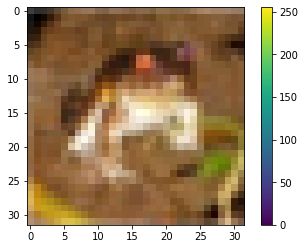

In [5]:
## 3. 전처리  ... 전처리 data 확인 .. plt.colorbar() 오른:픽셀의 값,색 픽셀 , 정규화 -1 ~ 1 값(-1:검은색, 1:흰색)

plt.imshow(train_x[0].reshape(32,32,3))
plt.colorbar()
plt.show()

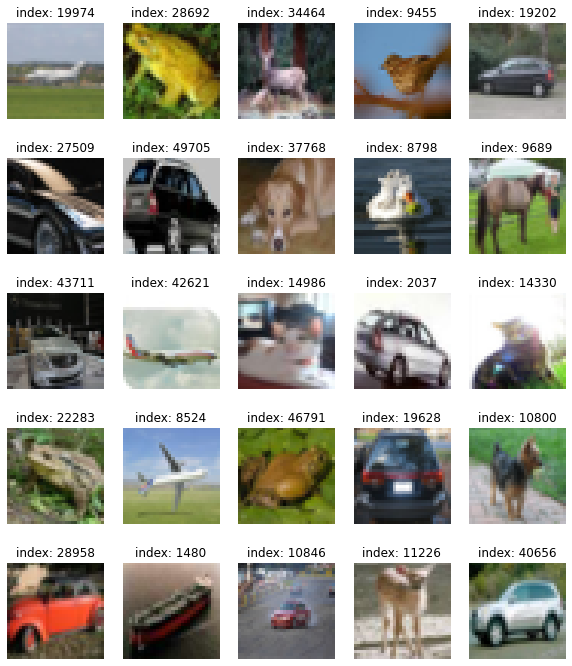

In [6]:
## 3. 전처리  ... 전처리 data 확인 
plt.figure(figsize=(10, 12))

for i in range(25):
    num = np.random.randint(1,50000) 
    plt.subplot(5, 5, i+1)
    plt.imshow(train_x[num].reshape(32,32,3))
    plt.title(f'index: {num}')
    plt.axis('off')

plt.show()

In [7]:
# 3. 전처리  ... 정규화 
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [8]:
## 3. 전처리 .... shuffle 만들기
BUFFER_SIZE = 50000
BATCH_SIZE = 128

train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [9]:
#4. DCGAN  ... generator
def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.3)

    # Second: Reshape layer
    model.add(layers.Reshape((8, 8, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.3))

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.3))

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

In [10]:
#4. DCGAN  ... generator  .. instance 생성
generator = make_generator_model()

generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             1638400   
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16384)             0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 128)         0

In [11]:
#4. DCGAN  ... generator  ..noise data 생성 ... generator 생성 확인용
noise = tf.random.normal([1, 100])

In [12]:
#4. DCGAN  ... generator  ..generator 생성 확인
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 32, 32, 3])

In [13]:
#4. DCGAN  ... discriminator .. 모델 생성
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU(alpha=0.3))
    model.add(layers.Dropout(0.4))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.3))
    model.add(layers.Dropout(0.4))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

In [14]:
#4. DCGAN  ... discriminator .. instance model 생성
discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)             

In [15]:
#4. DCGAN  ... discriminator .. 판별자 모델 확인(이전 node 생성ㅎ나 이미지)
decision = discriminator(generated_image, training=False)
decision


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00453404]], dtype=float32)>

In [16]:
#5. BinaryCrossEntropy & accuracy... BinaryCrossentropy(손실함수 값  .. 입력 판별자가 판별한 값
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [17]:
#5-1. BinaryCrossEntropy & accuracy... generator_loss  .. cross_entropy에 1인 벡터
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [18]:
#5-2. BinaryCrossEntropy & accuracy... discriminator_loss  cross_entropy에 1인 벡터
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [19]:
#5-3. BinaryCrossEntropy & accuracy 비교
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

In [20]:
#6 optimizer
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [21]:
#6 optimizer
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

In [22]:
#7 model detail .... train_step
#1. noise data & generator & discriminator & loss & accuracy & gradient & optimizer
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성  함수 필요

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)   #함수 필요
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)                 #loss 함수
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output)    #accuracy 함수 필요
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

In [23]:
#7 model detail .... image graph
#2  train_step과 함께 일정 간격으로 학습 현황을 볼 수 있는 샘플을 생성하는 함수
#저장했다가 show
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)     #model 함수
    np_predictions = predictions.numpy()
    np_predictions = (np_predictions * 127.5) + 127.5 # 정규화 되돌리기
    np_predictions = np_predictions.astype(int)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        
        predic_image = predictions[i].numpy()
        
        #np_predic_image = predic_image.numpy()
        np_predic_image = (predic_image * 127.5) + 127.5 # 정규화 되돌리기
        np_predic_image = np_predic_image.astype(int)

        plt.subplot(4, 4, i+1)
        plt.imshow(np_predic_image)
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

In [24]:
#7 model detail .... accuracy 그래프
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    fig = plt.figure(figsize=(14, 6))
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

In [25]:
#7 model detail .... 정기적으로 모델을 저장하기 위한 checkpoint
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [26]:
#8 model activation 함수
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)    #1
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)                 #2
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:                
            checkpoint.save(file_prefix=checkpoint_prefix)                               #4

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)                               #2
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)                                                   #3

In [27]:
#8 model activation  .. 자원 확인
save_every = 5
EPOCHS = 500

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

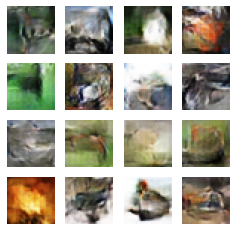

Time for training : 10894 sec


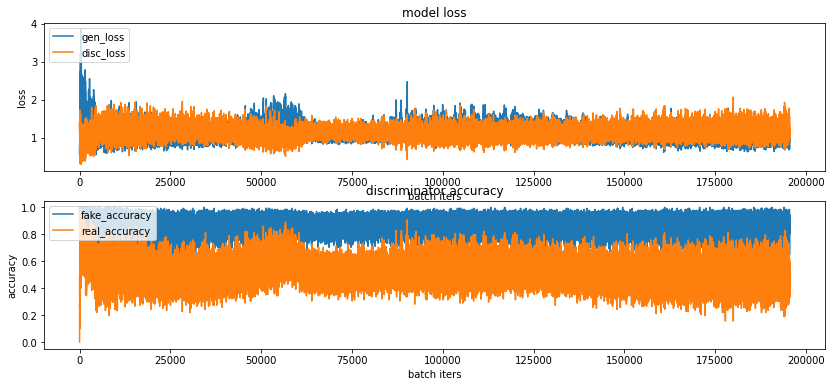

CPU times: user 3h 10min 38s, sys: 20min 3s, total: 3h 30min 41s
Wall time: 3h 1min 45s


In [28]:
%%time
train(train_dataset, EPOCHS, save_every)
# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/fashion/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.

In [85]:
#8 model activation ... graph 
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif
# fashion_mnist_dcgan.gif  , https://d3s0tskafalll9.cloudfront.net/media/documents/fashion_mnist_dcgan.gif

-rw-r--r-- 1 root root 3066679 Oct 22 03:09 /aiffel/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif


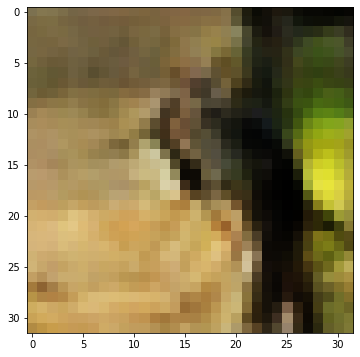

In [94]:
#8 model activation  ... checkpoint 확인
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

save_every = 5
EPOCHS = 200

# 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 봅니다. 
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

np_generated = generated_image.numpy()
np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
np_generated = np_generated.astype(int)
plt.imshow(np_generated[0])
plt.show()  # 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것입니다.

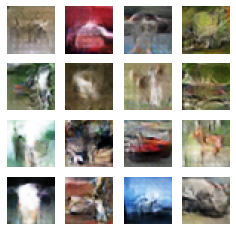

Time for training : 3205 sec


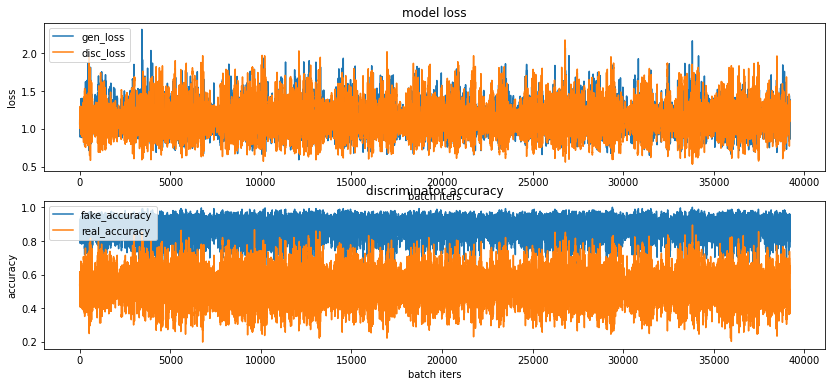

CPU times: user 55min 12s, sys: 5min 18s, total: 1h 31s
Wall time: 53min 27s


In [95]:

%%time
train(train_dataset, EPOCHS, save_every)